In [1]:
import warnings
warnings.filterwarnings('ignore')

# PCA

## Is molecule density sparse?

In [2]:
from pyscf import gto, dft
import grad_dft as gd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import SparsePCA, PCA

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
def create_density(mol):
    mean_field = dft.UKS(mol)
    ground_truth_energy = mean_field.kernel()

    # Then we can use the following function to generate the molecule object
    HF_molecule = gd.molecule_from_pyscf(mean_field)
    
    array = HF_molecule.density()
    return array

In [4]:
def plot_heatmap(array):
    plt.figure(figsize=(8, 4))
    plt.imshow(array, cmap='hot', aspect="auto")
    plt.colorbar()
    plt.title("Heatmap")
    plt.show()
    

converged SCF energy = -99.8206324520547  <S^2> = -8.8817842e-16  2S+1 = 1


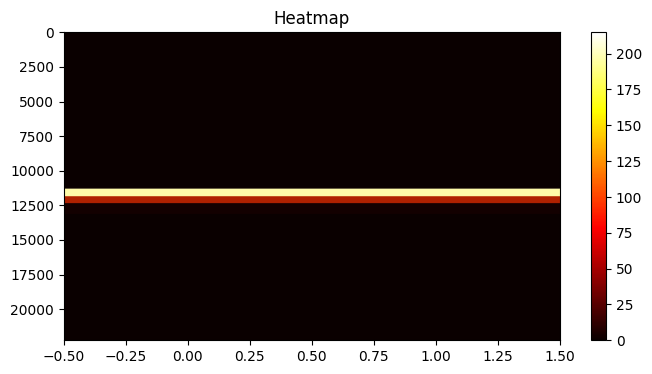

In [5]:
molecule = gto.M(atom=[["H", (0, 0, 0)], ["F", (0, 0, 1.1)]], basis="def2-tzvp")

electron_d1 = create_density(molecule)

plot_heatmap(electron_d1)

In [6]:
electron_d1[:, 0]

Array([5.3829354e-11, 2.5878811e-13, 2.5878740e-13, ..., 5.4072323e-13,
       1.3891563e-01, 1.3891563e-01], dtype=float32)

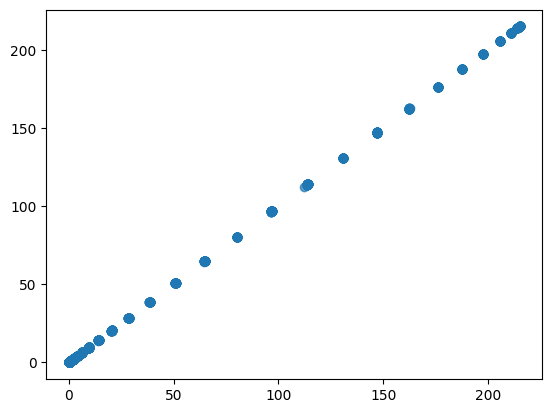

In [7]:
plt.scatter(electron_d1[:, 0], electron_d1[:, 1], label="Original Data", alpha=0.7)

converged SCF energy = -1.11599939387619  <S^2> = -1.7763568e-15  2S+1 = 1


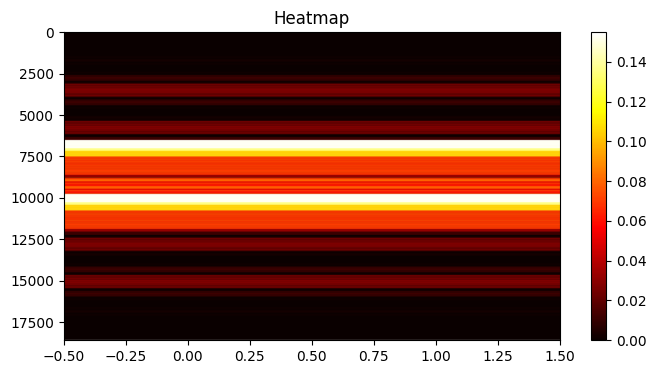

In [8]:
molecule = gto.M(atom=[["H", (0, 0, 0)], ["H", (0, 0, 1)]], basis="def2-tzvp", charge=0, spin=0)
electron_d2 = create_density(molecule)
plot_heatmap(electron_d2)

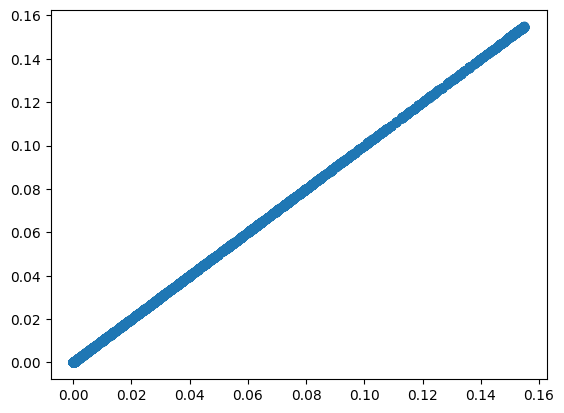

In [9]:
plt.scatter(electron_d2[:, 0], electron_d2[:, 1], label="Original Data", alpha=0.7)

In [19]:
def pca(X, PCA_class):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    n_components = 1
    sparse_pca = PCA_class(n_components=n_components, alpha=1, random_state=42)
    X_sparse_pca = sparse_pca.fit_transform(X_scaled)
    return X_sparse_pca

In [29]:
(pca(electron_d1, SparsePCA) == pca(electron_d1, PCA)).all()

True

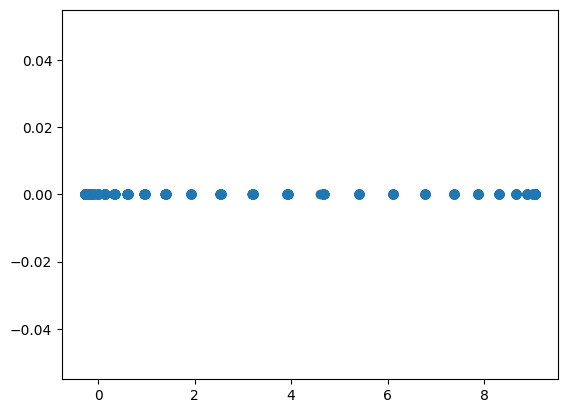

In [27]:
plt.scatter(_:=pca(electron_d1, PCA), np.zeros_like(_))

Why is it linear like so